In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Estuarine_Crocodile.csv')
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


In [3]:
df['HeadLength'].corr(df['BodyLength'])

0.9898911439276337

In [4]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can

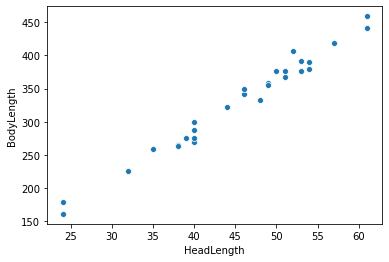

In [5]:
sns.scatterplot(df['HeadLength'],df['BodyLength'])

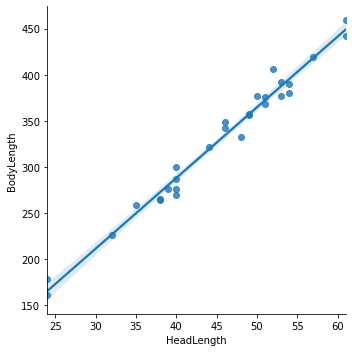

In [6]:
sns.lmplot(data = df, x = 'HeadLength', y = 'BodyLength')

### Linear Regression

In [7]:
X = df['HeadLength']
Y = df['BodyLength']

In [12]:
X = sm.add_constant(X)
print(type(X))
print(X.head())

<class 'pandas.core.frame.DataFrame'>
   const  HeadLength
0    1.0          24
1    1.0          24
2    1.0          32
3    1.0          35
4    1.0          40


In [26]:
ols_model = sm.OLS(Y,X) ## Y is endogenous (dependent) variable, X is exogenous variable
results = ols_model.fit() ## function of OLS to fit the model to the results

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyLength   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.38e-23
Time:                        11:34:36   Log-Likelihood:                -105.32
No. Observations:                  28   AIC:                             214.6
Df Residuals:                      26   BIC:                             217.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2740      9.966     -1.834      0.078     -38.760       2.212
HeadLength     7.6601      0.215     35.588      0.000       7.218       8.103
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.597
Skew:                           0.323   Prob(JB):                        0.742
Kurtosis:                       2.693   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
Y_pred = results.predict(X)
residuals = Y - Y_pred
residuals

0     -4.568483
1     13.431517
2     -0.849320
3      9.170366
4     -1.130157
5     11.869843
6      7.909215
7    -16.410995
8     25.948587
9     10.007645
10     3.608691
11   -15.371623
12    -7.809948
13    14.909215
14    -8.809948
15     0.928901
16    -4.470053
17    -1.071099
18   -18.130157
19     4.288482
20    -6.992355
21   -10.711518
22     3.229424
23    -5.371623
24    12.268796
25     0.648063
26   -12.130157
27    -4.391309
dtype: float64

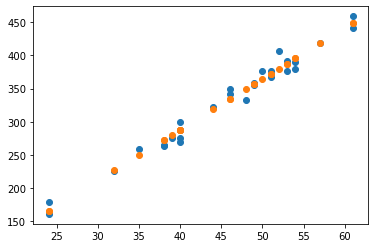

In [31]:
plt.plot(X['HeadLength'], Y, 'o') ## actual values in blue
plt.plot(X['HeadLength'],Y_pred, 'o') ## predicted values in orange
plt.show()

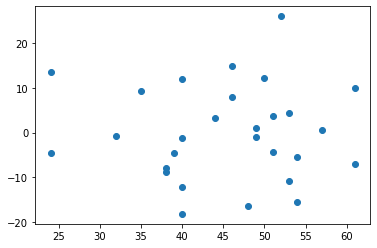

In [32]:
sns.lmplot(X['HeadLength'], residuals, 'o')
plt.show()

In [35]:
np.sqrt(np.mean(residuals**2)) ## Root-Mean-Square Error (RMSE)

10.408089501725746

### Multiple Linear Regression

In [39]:
## Using FitBit dataset
df = pd.read_csv('Fitbit2.csv')

In [40]:
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


steps:
1. correlation matrix
2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings
3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

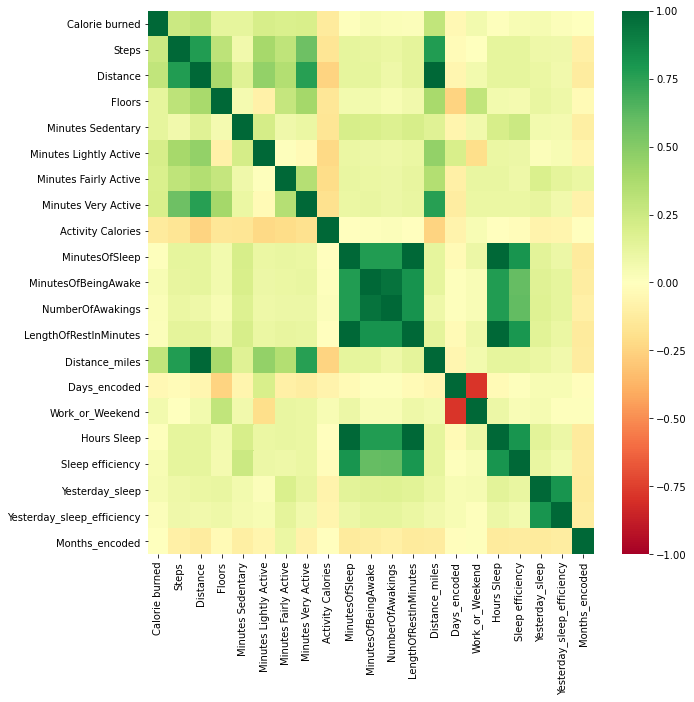

In [52]:
# 1. correlation matrix

plt.figure(figsize = [10,10])
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'RdYlGn')

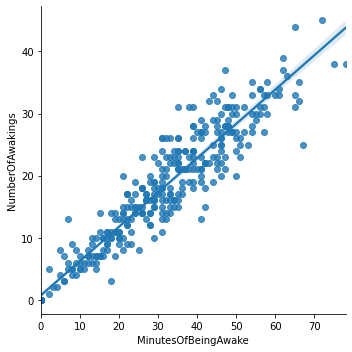

In [49]:
# 2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings
sns.lmplot(data = df, x = 'MinutesOfBeingAwake', y = 'NumberOfAwakings')

In [50]:
# 3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]
X = df['NumberOfAwakings']
Y = df['MinutesOfBeingAwake']
X = sm.add_constant(X)

In [51]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         12:38:17   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Y = b0 + b1 * X
# MinutesOfBeingAwake = coefconst + coefNOA * NumberOfAwakings
# MinutesOfBeingAwake(5) = 1.4381 + 1.6405 * 5 = 9.64
# MinutesOfBeingAwake(6) = 1.4381 + 1.6405 * 6 = 11.2811
# MinutesOfBeingAwake

### Estimating OLS using statsmodels

In [62]:
# 3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]
X = df[['NumberOfAwakings','Distance_miles']] 
## ACHTUNG! We don't want to bring in numerous variables if these variables are correlated with each other.
## This could tamper with coefficients (as they measure how Y reacts to an increment of Xn, ceteris paribus.
## If you have other variables that are exactly the same, "ceteris paribus" is no longer in place.)
Y = df['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# No. Observations - Df Residuals - 1 = Df Model (Df = Degrees of freedom)

# R-squared, Adj. R-squared, F-statistic, etc. => Goodness of fit

# Standard Error: standard deviation of the coefficient. It tells us how precisely we've measured the coefficient, 
# and how likely it is that the coefficient for the sample is the one for the actual population. This error 
# decreases as we imcrease the sample or distribution size.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     1794.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          3.22e-189
Time:                         12:59:49   Log-Likelihood:                -1154.3
No. Observations:                  367   AIC:                             2315.
Df Residuals:                      364   BIC:                             2326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5001      0.881     -0.567      0.571      -2.233       1.233
NumberOfAwakings     1.6336      0.028     59.332      0.000       1.579       1.688
Distance_miles       0.3860      0.140      2.761      0.006       0.111       0.661
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.472
Skew:                           0.270   Prob(JB):                     8.89e-08
Kurtosis:                       4.353   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# [MinutesOfBeingAwake] = -5.001 + 1.6336*[NumberOfAwakings] + 0.3860*[Distance_miles]

In [64]:
# 3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]
X = df['Distance_miles']
Y = df['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.017
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     6.319
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):             0.0124
Time:                         14:21:46   Log-Likelihood:                -1588.7
No. Observations:                  367   AIC:                             3181.
Df Residuals:                      365   BIC:                             3189.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.9441      2.597      8.451      0.000      16.838      27.051
Distance_miles     1.1415      0.454      2.514      0.012       0.248       2.035
==============================================================================
Omnibus:                       17.376   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.856
Skew:                           0.088   Prob(JB):                       0.0197
Kurtosis:                       2.305   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

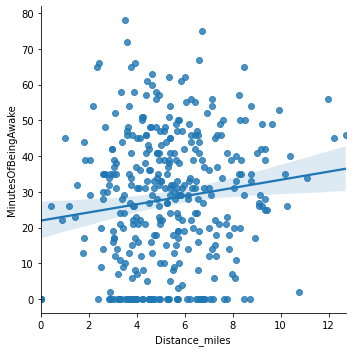

In [65]:
sns.lmplot(data=df, x='Distance_miles',y='MinutesOfBeingAwake')

In [66]:
Y_pred = results.predict(X)
residuals = Y - Y_pred
residuals

0       3.594798
1       3.047414
2      16.558390
3       5.495090
4      40.410107
         ...    
362     1.033228
363    -9.732563
364     1.423082
365     9.565080
366    30.033901
Length: 367, dtype: float64

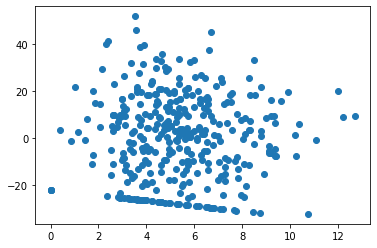

In [72]:
plt.scatter(x = df['Distance_miles'], y = residuals)
plt.show()